In [43]:
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')   
  


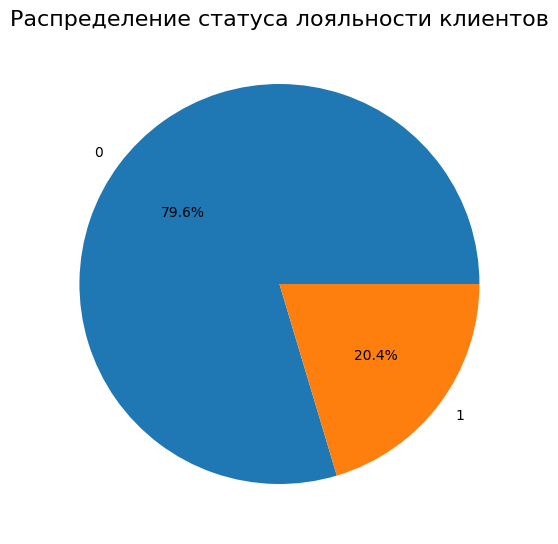

In [8]:
level_loyalty = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    level_loyalty,
    labels=level_loyalty.index,
    autopct='%.1f%%'
)
title = axes.set_title('Распределение статуса лояльности клиентов', fontsize=16)

По круговой диаграмме выше видно, что доля лояльных клиентов составляет 79,6% от общего количества.  

Text(0, 0.5, 'Количество клиентов, чел')

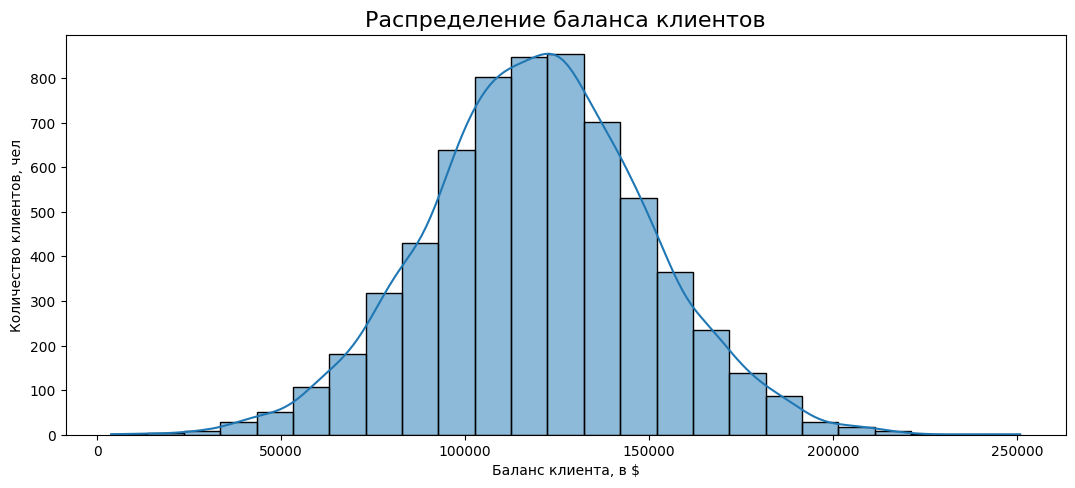

In [5]:

fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
histplot = sns.histplot(
    data=churn_data[churn_data['Balance'] > 2500], 
    x='Balance', 
    bins=25,
    kde=True
)
histplot.set_title('Распределение баланса клиентов', fontsize=16)
histplot.set_xlabel('Баланс клиента, в $')
histplot.set_ylabel('Количество клиентов, чел')

Данная гистограмма описывает общее распределение размера баланса клиентов, у которых баланс >2500 $. Весь диапазон цен разбит на 25 равных интервалов. У основной части клиентов баланс лежит в диапазоне от 50000 до 200000.

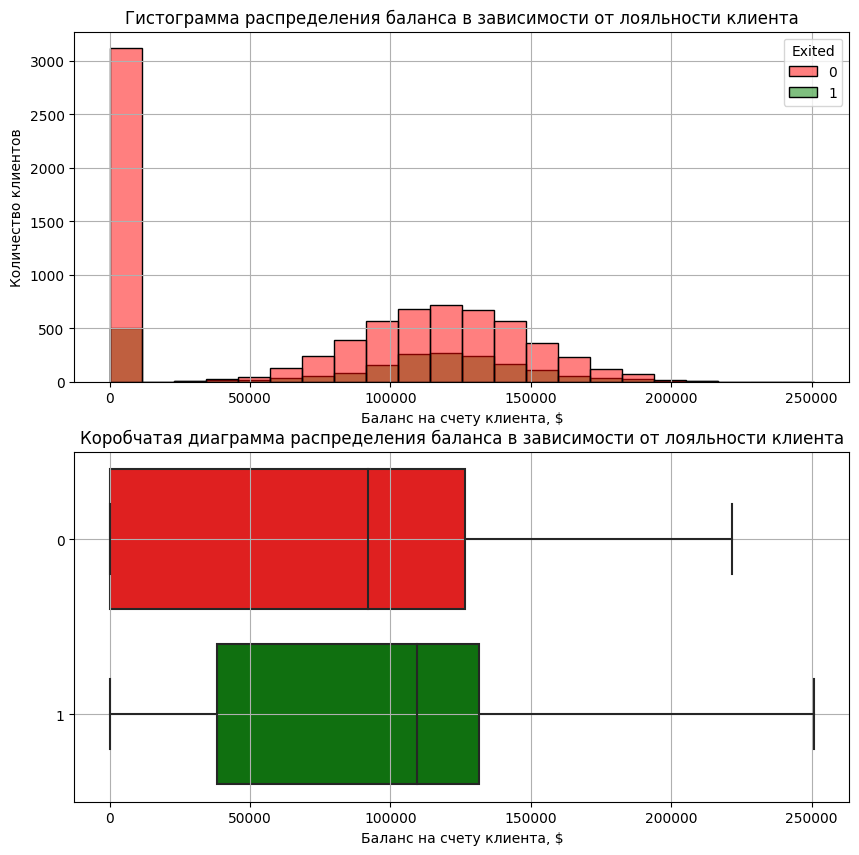

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10)) 
histplot=sns.histplot(
    data=churn_data, 
    x='Balance', 
    hue='Exited',
    ax=axes[0],
    palette=['red', 'green']
)
histplot.set_title('Гистограмма распределения баланса в зависимости от лояльности клиента')
histplot.set_ylabel('Количество клиентов')
histplot.set_xlabel('Баланс на счету клиента, $')
histplot.grid()

boxplot=sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    ax=axes[1],
    palette=['red', 'green']
)
boxplot.set_title('Коробчатая диаграмма распределения баланса в зависимости от лояльности клиента')
boxplot.set_ylabel('')
boxplot.set_xlabel('Баланс на счету клиента, $')
boxplot.grid()

Гораздо больше лояльных клиентов, имеющих нулевой баланс. Лояльные клиенты более активно пользуются услугами банка

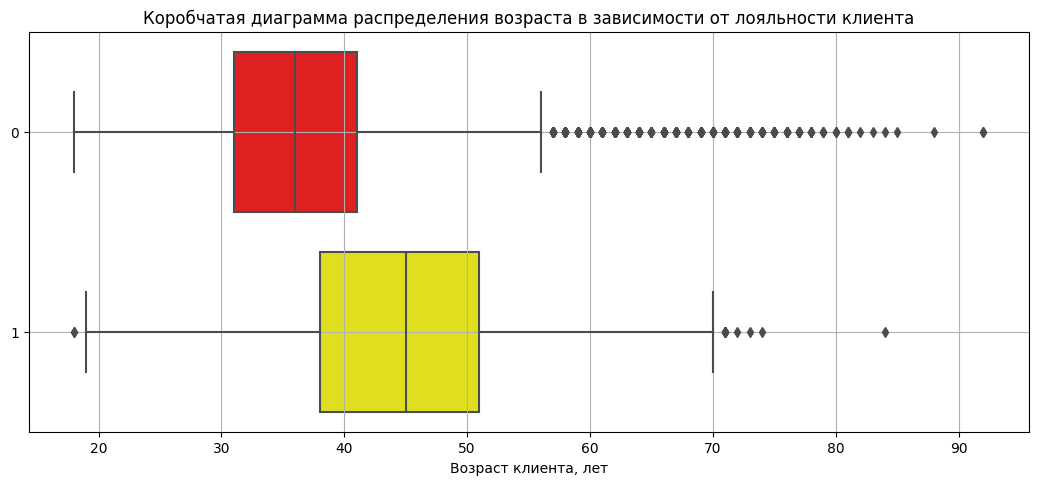

In [12]:
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
boxplot=sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    palette=['red', 'yellow']
)
boxplot.set_title('Коробчатая диаграмма распределения возраста в зависимости от лояльности клиента')
boxplot.set_ylabel('')
boxplot.set_xlabel('Возраст клиента, лет')
boxplot.grid()

В группе лояльных клиентов больше выбросов.  Медианное значение для ушедших клиентов 45 лет, поэтому в первую очередь необходимо обратить внимание для предотвращения оттока на эту группу.

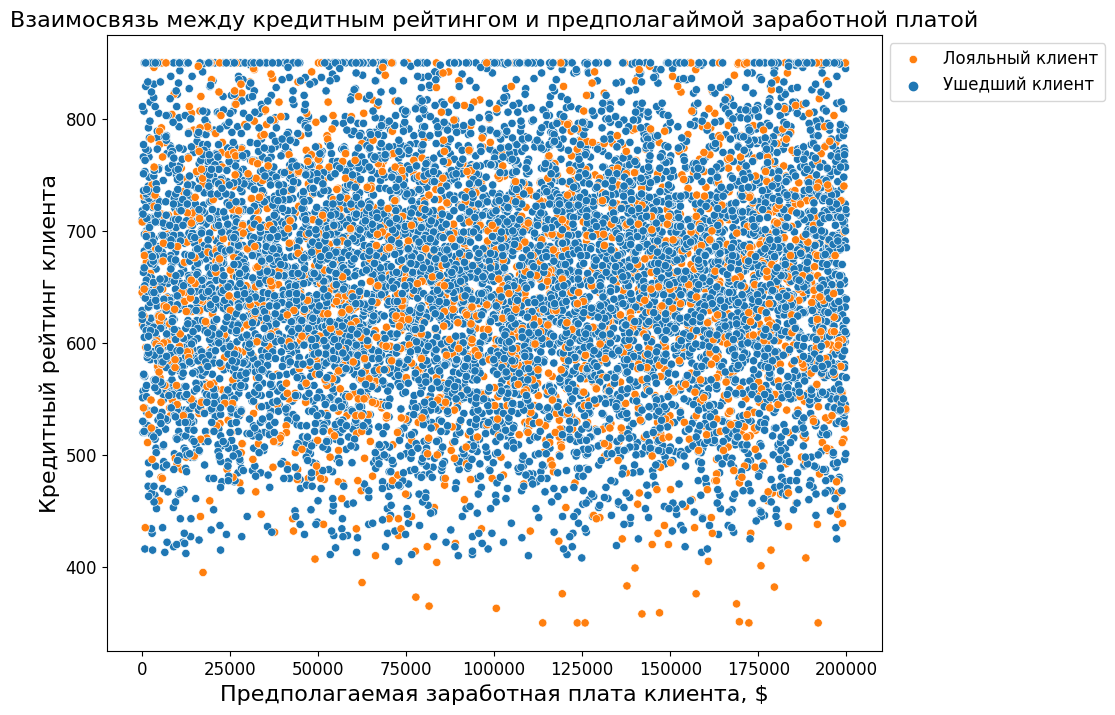

In [19]:
fig, axes = plt.subplots(figsize=(10,8))
sns.scatterplot(
    data=churn_data,
    y='CreditScore',
    x='EstimatedSalary',
    hue='Exited'
);  

axes.set_title('Взаимосвязь между кредитным рейтингом и предполагаймой заработной платой', fontsize=16)
axes.set_ylabel('Кредитный рейтинг клиента',fontsize=16)
axes.set_xlabel('Предполагаемая заработная плата клиента, $', fontsize=16)

axes.legend(labels = ['Лояльный клиент','Ушедший клиент'],loc = 2, fontsize =12, bbox_to_anchor=(1, 1));
axes.tick_params(axis= 'y', labelsize=12)
axes.tick_params(axis='x', labelsize=12)

Явной взаимосвязи между признаками не прослеживается

In [46]:
churn_group = churn_data.groupby(['Gender'], as_index=False).mean()
px.bar(
    data_frame=churn_group,
    x='Gender',
    y='Exited',
    height=300,
    width=600,
    title='Соотношение ушедших мужчин и женщин'
)

C:\Users\kirill_po\AppData\Local\Temp\ipykernel_107576\703452251.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Чаще уходят женщины

In [47]:
churn_group = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
fig = px.bar(
    data_frame=churn_group,
    x='NumOfProducts',
    y='RowNumber',
    color='Exited',
    barmode='group',
    height=300,
    width=800,
    title='Соотношение ушедших и лояльных клиентов в зависимости от числа услуг'
)
fig.show()

Для клиентов с количеством услуг = 1 или 2 больше лояльных клиентов, чем ушедших, а для клиентов с 3 услугами - обратная корреляция, для 4 услуг -  все клиенты ушли.

In [60]:
churn_group = churn_data[churn_data['Exited'] == 1].groupby(['IsActiveMember'], as_index=False)[['Exited']].count()
fig = px.histogram(
    data_frame=churn_group,
    x='IsActiveMember',
    y='Exited',
    color='IsActiveMember',
    height=500,
    width=1000,
    title='Отток клиентов в зависимости от их статуса'
)
fig.update_layout(yaxis_title="Количество клиентов")
fig.update_layout(xaxis_title="Статус клиента")
fig.update_xaxes(type='category')
fig.show()



Клиенты с неактивным статусом более склонны к оттоку.  Необходимо проанализировать причины неактивности клиентов, связаться с этой группой и уточнить у них что не устраивает и что нужно улучшить, чтобы они стали более активными и рекомендовали своим знакомым , возможно обучить, простимулировать использовать данные сервисы, предложить выгодные условия для долгосрочного сотрудничества

In [63]:
churn_countryes = churn_data.groupby(['Geography'])[['Exited']].mean() 
fig = px.choropleth(
    data_frame=churn_countryes,
    locations=churn_countryes.index,
    locationmode = "country names", 
    color="Exited", 
    title='Распределение доли ушедших клиентов по странам', 
    width=1000, 
    height=500,
    range_color=[0, 0.5], 
    color_continuous_scale='Jet' 
)
fig.show()


В Германии наблюдается самый высокий показатель оттока.  Связано возможно, что данный банк имеет более слабую позицию с локальными конкурентами, конкретно в этой стране, чем во Франции и Испании.

Text(0.5, 25.722222222222214, 'Количество лет, в течение которых клиент пользуется услугами банка')

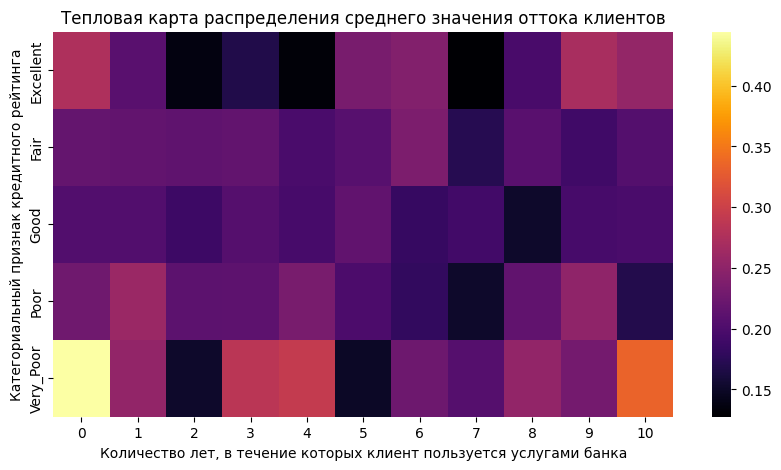

In [75]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    'Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)


fig, axes = plt.subplots(figsize=(10, 5))
heatmap = sns.heatmap(data=pivot, ax=axes, cmap='inferno')
heatmap.set_title('Тепловая карта распределения среднего значения оттока клиентов');
heatmap.set_ylabel('Категориальный признак кредитного рейтинга')
heatmap.set_xlabel('Количество лет, в течение которых клиент пользуется услугами банка')



Уходят чаще всего клиенты, которые пользуются в банке услугами меньше года и имеют категориальный кредитный рейтинг = 'Very Poor'